![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39129299-787f2b38-470a-11e8-958e-84f118846629.jpg"
    style="width:250px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Diabetes Analysis

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

<i>
> Dataset source: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html <br>
> Dataset description: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst
</i>

### Data Set Characteristics

Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. Don't worry, we have you covered; this is the description of each one of the fields in the CSV file:

- **Age**	
- **Sex**	
- **Body mass index**
- **Average blood pressure**
- **S1**
- **S2**
- **S3**
- **S4**
- **S5**
- **S6**

<i>Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).</i>

- Number of Instances: 442
- Number of Attributes:	First 10 columns are numeric predictive values
- Target: Column 11 is a quantitative measure of disease progression one year after baseline

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

Let's start analyzing it!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `diabetes` calling sklearn `load_diabetes()` in a DataFrame structure, also show it's shape and first rows.
        </td>
    </tr>
</table>

In [3]:
diabetes_data = load_diabetes()

df = pd.DataFrame(data=diabetes_data['data'], columns=diabetes_data['feature_names'])
df['target'] = diabetes_data['target']

print(df.shape)

df.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Show a **boxplot** of each variable, except `target`.
        </td>
    </tr>
</table>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

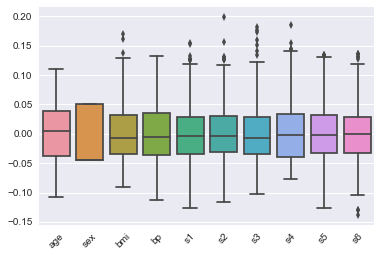

In [4]:
df_without_target = df.loc[:, df.columns != 'target']

sns.boxplot(data=df_without_target)
plt.xticks(rotation=45)

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Show the distribution of `target` column using **distplot**.
        </td>
    </tr>
</table>

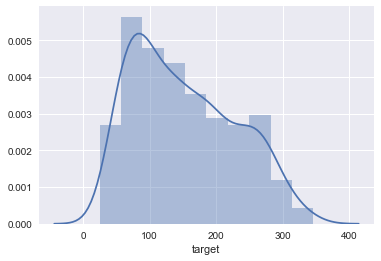

In [5]:
sns.distplot(df['target'])

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Create **X** with predictor variables, and **Y** with the target variable. Verify the shape of both X and Y.
        </td>
    </tr>
</table>

In [6]:
variables = df.columns[ : -1]
X = df[variables].values

target = df.columns[-1]
Y = df[target].values

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

X shape: (442, 10)
Y shape: (442,)


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Create **train/test partitions** <i>(X_train, X_test, Y_train, Y_test)</i> using sklearn `train_test_split` function, with `test_size=0.3`.
        </td>
    </tr>
</table>

In [7]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Create a **LinearRegression()** object and fit it with `X_train` and `Y_train`.
        </td>
    </tr>
</table>

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Now `predict` new values using <i>X_test</i>.
        </td>
    </tr>
</table>

In [9]:
Y_pred = lr.predict(X_test)

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Check `r2_score` and `mean_absolute_error` of your prediction.
        </td>
    </tr>
</table>

In [10]:
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(Y_test, Y_pred)))
print('Variance score (R^2): {}'.format(r2_score(Y_test, Y_pred)))

Mean Absolute Error (MAE): 39.211135948201104
Variance score (R^2): 0.5789660549617198


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show a `scatter` with `Y_test` over predicted values, and draw a line of the predicted values.
        </td>
    </tr>
</table>

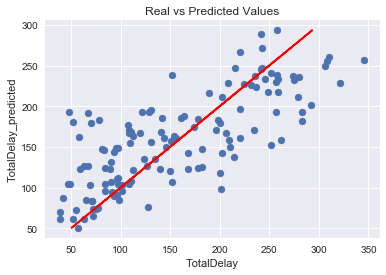

In [11]:
plt.title('Real vs Predicted Values')
plt.xlabel('TotalDelay')
plt.ylabel('TotalDelay_predicted')

plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red')

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            Go further and make a **CrossValidation** evaluation using **10 k-fold**. Show the mean of all the errors using `cross_val_score`.
        </td>
    </tr>
</table>

In [12]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(shuffle=True)

scores = cross_val_score(lr, X_test, Y_test, scoring="neg_mean_absolute_error", cv=kf)

print('MAE: {}'.format(-scores))
print('MAE_mean: {}'.format(-scores.mean()))

MAE: [31.77850442 48.28381105 49.15397342]
MAE_mean: 43.07209629595847


![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)